In [1]:
# Dataset : http://cb.lk/covid_19

!wget http://cb.lk/covid_19

--2021-03-30 10:41:39--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2021-03-30 10:41:40--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2021-03-30 10:41:41--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2021-03-30 10:41:41--  https://www.dropbox.com/s/raw/7

In [2]:
!unzip covid_19


Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [3]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [5]:
# CNN Based Model in KERAS

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [7]:
# Train from Scratch

train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 16,
    class_mode = 'binary')

Found 224 images belonging to 2 classes.


In [9]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [10]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 16,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


In [11]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=5,
    epochs=20,
    validation_data = validation_generator,
    validation_steps =2,
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
5/5 [==============================] - 29s 6s/step - loss: 1.1121 - accuracy: 0.5309 - val_loss: 0.6830 - val_accuracy: 0.5938
Epoch 2/20
5/5 [==============================] - 27s 5s/step - loss: 0.6358 - accuracy: 0.5861 - val_loss: 0.6348 - val_accuracy: 0.8125
Epoch 3/20
5/5 [==============================] - 27s 5s/step - loss: 0.7626 - accuracy: 0.4800 - val_loss: 0.6540 - val_accuracy: 0.7812
Epoch 4/20
5/5 [==============================] - 27s 5s/step - loss: 0.5536 - accuracy: 0.7644 - val_loss: 0.5322 - val_accuracy: 0.8750
Epoch 5/20
5/5 [==============================] - 27s 5s/step - loss: 0.4742 - accuracy: 0.8146 - val_loss: 0.3293 - val_accuracy: 0.9062
Epoch 6/20
5/5 [==============================] - 27s 5s/step - loss: 0.2265 - accuracy: 0.9137 - val_loss: 0.2503 - val_accuracy: 0.8438
Epoch 7/20
5/5 [==============================] - 27s 5s/step - loss: 0.3420 - accuracy: 0.8898 - val_loss: 0.2398 - val_accuracy: 1.0000
Epoch 8/20
5/5 [==================

**You can try this experiment using TRANSFER LEARNING as well**

**We can use Grad Cam Techniques to visualize the feature detection**

In [34]:
# Class Activation Maps
# GRAD_CAM

**Loss is very less**

In [12]:
model.save("model_adv.h5")

In [13]:
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.06617105007171631, 0.9821428656578064]

In [14]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.05831211060285568, 0.9666666388511658]

In [15]:
model = load_model("model_adv.h5")

In [16]:
import os

In [17]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [18]:
y_actual = []
y_test = []

In [19]:
for i in os.listdir("./CovidDataset/Val/Normal"):
  img = image.load_img("./CovidDataset/Val/Normal/"+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [20]:
for i in os.listdir("./CovidDataset/Val/Covid"):
  img = image.load_img("./CovidDataset/Val/Covid/"+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [21]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
cm = confusion_matrix(y_actual,y_test)

In [24]:
import seaborn as sns

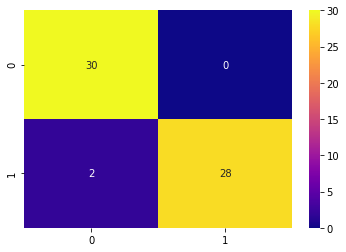

In [25]:
sns.heatmap(cm,cmap="plasma",annot=True)

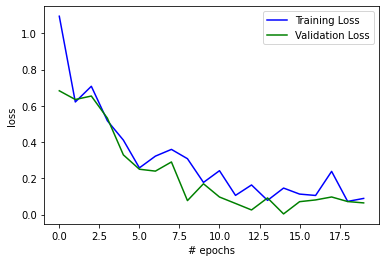

In [26]:
plt.plot(hist.history['loss'],'b',label='Training Loss')
plt.plot(hist.history['val_loss'],'g',label='Validation Loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

**Deep-COVID: Predicting COVID-19 from chest X-ray images using deep
transfer learning**

Highlights
•
Preparing a dataset of around 5000 X-ray images for COVID-19 detection.

•
Training 4 state-of-the-art convolutional networks for COVID-19 detection.

•
Presenting the sensitivity, specificity, ROC curve, AOC, and confusion matrix for each model.

•
Achieving sensitivity and specificity rate of higher than 90% with high confidence interval.